In [12]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

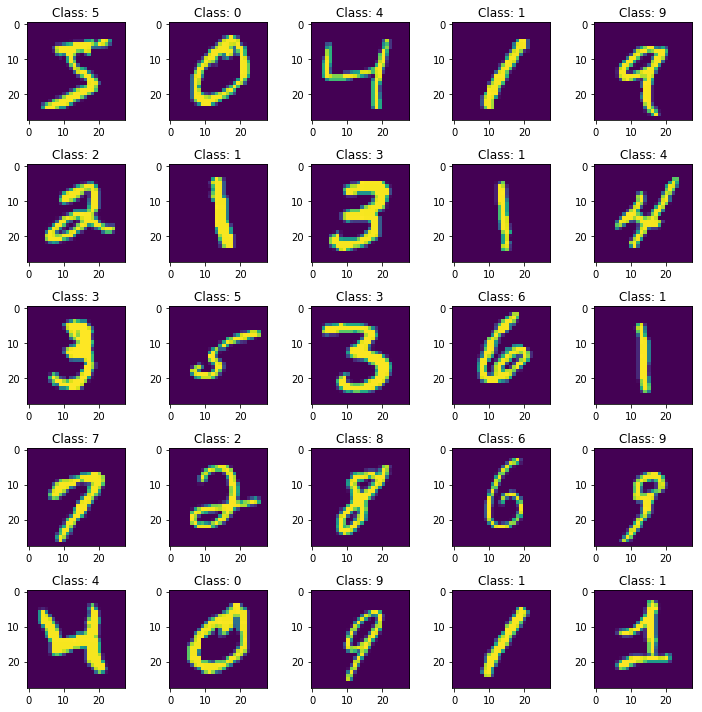

In [8]:
plt.figure(figsize = (10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx])
    plt.title('Class: {}'.format(y_train[idx]))

plt.tight_layout()

In [30]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
if np.max(X_train) > 1: X_train = X_train/255
if np.max(X_test) > 1: X_test = X_test/255

In [15]:
if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)



In [27]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), input_shape=input_shape), MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters = 64, kernel_size = (3,3), input_shape=input_shape), MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation = 'softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trenowanie

In [31]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 44s 728us/step - loss: 0.1652 - acc: 0.9526 - val_loss: 0.0461 - val_acc: 0.9852
Epoch 2/3
60000/60000 [==============================] - 40s 668us/step - loss: 0.0439 - acc: 0.9868 - val_loss: 0.0344 - val_acc: 0.9884
Epoch 3/3
60000/60000 [==============================] - 40s 670us/step - loss: 0.0260 - acc: 0.9917 - val_loss: 0.0370 - val_acc: 0.9892


# Testowanie

In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.03704109663080308, 0.9892]